In [1]:
import numpy as np

import librosa

import scipy.io.wavfile

import senmf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/home/gsmith/work/senmf/lib/python2.7/site-packages/librosa/core.py:26: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  'Falling back to scipy.signal')


### Compute a Spectrogram

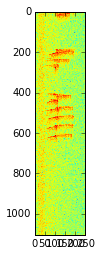

In [2]:
sr, x = scipy.io.wavfile.read('data/bird-songs.wav')
stft = librosa.stft(x, n_fft=1024, hop_length=200).T

X = np.abs(stft)[:,:250]

imshow(np.log(X))

### Decompose the Spectrogram

In [3]:
n_bases = 6
window_width = 20

nmf = senmf.SENMF(n_bases=n_bases, window_width=window_width, n_iter=10, X_shape=X.shape)
A = nmf.rand_A(seed=1)

freq_mask = np.zeros((window_width, 250))
freq_mask[:, 50:-50] = 1

D = nmf.rand_D(seed=1)

for b in range(n_bases-1):
    D[b] = D[b] * freq_mask

%time A, D = nmf.fit(X, A, D)

CPU times: user 52.5 s, sys: 10.8 s, total: 1min 3s
Wall time: 1min 3s


### Inspect Decomposition

In [4]:
X_bar = nmf.reconstruct(A, D)

#### Show the estimate

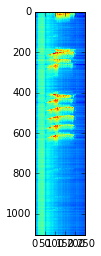

In [5]:
imshow(np.log(X_bar))

#### Show the activations

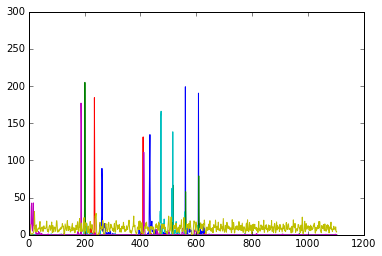

In [6]:
plot(A.T)

#### Show the basis windows


/usr/home/gsmith/work/senmf/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from IPython.kernel.zmq import kernelapp as app


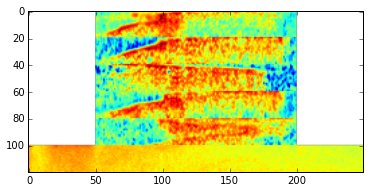

In [7]:
(x,y,z) = D.shape
imshow(np.log(D.reshape(x*y, z)))